# Data Preprocessing

In [1]:
# import all packages
import pandas as pd
import os
import pandas_profiling
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# import dataset
current_working_directory = os.getcwd()
df = pd.read_excel(current_working_directory + '\\Bankruptcy_data_Final.xlsx')
df

Data Year - Fiscal  Tobin's Q       EPS  Liquidity  Profitability  \
0                    1979   0.980000  1.580000   0.360000       0.180000   
1                    1980   0.980000  1.410000   0.360000       0.190000   
2                    1981   0.870000  0.310000   0.320000       0.130000   
3                    1982   1.130000  0.710000   0.280000       0.140000   
4                    1983   1.260000  0.750000   0.410000       0.130000   
...                   ...        ...       ...        ...            ...   
92867                2009   1.520923 -1.488171  -0.015494      -0.758859   
92868                2010   1.988495 -1.807630   0.093838      -1.204734   
92869                2011   0.923868 -0.015660   0.039260       0.000000   
92870                2012   0.787787 -0.133054   0.053678      -0.029471   
92871                2013   0.885386 -0.648028  -0.036524      -0.219774   

       Productivity  Leverage Ratio  Asset Turnover  Operational Margin  \
0          0.130000        1.330000        1.770000            0.070000   
1          0.120000        1.310000        1.590000            0.070000   
2          0.080000        1.030000        1.550000            0.050000   
3          0.080000        0.800000        1.390000            0.060000   
4          0.080000        0.200000        1.300000            0.060000   
...             ...             ...             ...                 ...   
92867     -0.056905    -1042.104918        0.174115           -0.326823   
92868     -0.121122       -4.530214        0.215844           -0.561155   
92869     -0.082429        0.744907        0.254186           -0.324286   
92870      0.000998        0.574570        0.195683            0.005101   
92871     -0.144842        0.693342        0.222476           -0.651048   

       Return on Equity  Market Book Ratio  Assets Growth  Sales Growth  \
0              0.150000           2.220000            NaN           NaN   
1              0.130000           2.410000       0.126319      0.014278   
2              0.040000           2.560000       0.368077      0.327909   
3              0.050000           5.280000      -0.020809     -0.118904   
4              0.040000           8.680000       0.233089      0.146807   
...                 ...                ...            ...           ...   
92867         -6.614095          -1.846719      -0.073287     -0.557483   
92868         -4.519074          -2.474549      -0.201835     -0.010544   
92869         -0.569448        3274.505633      -0.168001     -0.020206   
92870         -0.085842          36.474842       0.076936     -0.170928   
92871         -0.498483          55.624410      -0.063630      0.064574   

       Employee Growth  BK  
0                  NaN   0  
1             0.040179   0  
2             0.566524   0  
3            -0.095890   0  
4             0.053030   0  
...                ...  ..  
92867        -0.076923   0  
92868        -0.208333   0  
92869        -0.105263   0  
92870        -0.058824   0  
92871         0.062500   1  

[92872 rows x 15 columns]

In [3]:
# EDA
pandas_profiling.ProfileReport(df)

In [4]:
# drop 27 completely duplicated rows
df.drop_duplicates(inplace=True)

In [5]:
# Standardize every column
df_std = df[list(df)].copy()

features = list(df_std)
scaler = StandardScaler().fit(df_std[features])
df_std[features] = scaler.transform(df_std[features])

df_std

Data_Year_-_Fiscal  Tobin's_Q       EPS  Liquidity  Profitability  \
0               -2.543296  -0.027018  0.007308   0.024600       0.043887   
1               -2.442012  -0.027018  0.007230   0.024600       0.043902   
2               -2.340728  -0.027140  0.006729   0.024271       0.043813   
3               -2.239445  -0.026852  0.006912   0.023942       0.043828   
4               -2.138161  -0.026708  0.006930   0.025011       0.043813   
...                   ...        ...       ...        ...            ...   
92867            0.495211  -0.026419  0.005911   0.021512       0.042501   
92868            0.596495  -0.025901  0.005765   0.022411       0.041843   
92869            0.697778  -0.027080  0.006581   0.021963       0.043621   
92870            0.799062  -0.027231  0.006528   0.022081       0.043578   
92871            0.900345  -0.027123  0.006293   0.021340       0.043297   

       Productivity  Leverage_Ratio  Asset_Turnover  Operational_Margin  \
0          0.037705       -0.000061        0.338451            0.037241   
1          0.037426       -0.000140        0.253394            0.037241   
2          0.036312       -0.001246        0.234492            0.037148   
3          0.036312       -0.002155        0.158886            0.037195   
4          0.036312       -0.004526        0.116357            0.037195   
...             ...             ...             ...                 ...   
92867      0.032497       -4.123111       -0.415668            0.035391   
92868      0.030708       -0.023217       -0.395950            0.034299   
92869      0.031786       -0.002373       -0.377832            0.035403   
92870      0.034111       -0.003046       -0.405476            0.036939   
92871      0.030047       -0.002577       -0.392816            0.033880   

       Return_on_Equity  Market_Book_Ratio  Assets_Growth  Sales_Growth  \
0              0.006417          -0.013671            NaN           NaN   
1              0.006361          -0.013664      -0.015832     -0.010618   
2              0.006105          -0.013658      -0.012555     -0.008852   
3              0.006134          -0.013554      -0.017826     -0.011367   
4              0.006105          -0.013423      -0.014385     -0.009872   
...                 ...                ...            ...           ...   
92867         -0.012764          -0.013827      -0.018537     -0.013836   
92868         -0.006823          -0.013851      -0.020280     -0.010757   
92869          0.004377           0.111861      -0.019821     -0.010812   
92870          0.005748          -0.012357      -0.016501     -0.011660   
92871          0.004578          -0.011623      -0.018406     -0.010335   

       Employee_Growth         BK  
0                  NaN  -0.077758  
1            -0.021542  -0.077758  
2             0.015853  -0.077758  
3            -0.031208  -0.077758  
4            -0.020628  -0.077758  
...                ...        ...  
92867        -0.029861  -0.077758  
92868        -0.039197  -0.077758  
92869        -0.031874  -0.077758  
92870        -0.028575  -0.077758  
92871        -0.019956  12.860361  

[92845 rows x 15 columns]

In [6]:
# isolate and impute rows with null values wiht KNNImputer with a n_neighbor of 5
null_data = df_std[df_std.isnull().any(axis=1)]

from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=5)
null_data_imputed = imputer.fit_transform(null_data)
df_null_data_imputed=pd.DataFrame(data=null_data_imputed,columns=list(null_data))
df_null_data_imputed

Data_Year_-_Fiscal  Tobin's_Q       EPS  Liquidity  Profitability  \
0               -2.543296  -0.027018  0.007308   0.024600       0.043887   
1               -2.442012  -0.027140  0.005386   0.021640       0.043769   
2               -2.442012  -0.026952  0.006702   0.025175       0.043991   
3               -1.733027  -0.025390  0.006556   0.021640       0.041628   
4               -1.631744  -0.025811  0.006579   0.022298       0.041997   
...                   ...        ...       ...        ...            ...   
11655           -0.821475  -0.027201  0.009315   0.021794       0.043967   
11656           -0.618908  -0.027279  0.005321   0.018144       0.043822   
11657           -0.517624  -0.027314  0.007428   0.017782       0.043770   
11658           -0.011207  -0.026509  0.007193   0.022685       0.043733   
11659           -0.011207  -0.024411  0.006577   0.024249       0.043136   

       Productivity  Leverage_Ratio  Asset_Turnover  Operational_Margin  \
0          0.037705       -0.000061        0.338451            0.037241   
1          0.033247        0.001401        0.054927            0.036822   
2          0.039377       -0.003341        0.291197            0.037475   
3          0.032411       -0.001800       -0.497945           -0.006211   
4          0.032690        0.000729       -0.497945           -0.198053   
...             ...             ...             ...                 ...   
11655      0.036186       -0.001133       -0.293155            0.037727   
11656      0.035402        0.001140       -0.327151            0.037526   
11657      0.034817        0.000711       -0.332045            0.037265   
11658      0.037848       -0.003571       -0.335211            0.038745   
11659      0.031387       -0.005148       -0.454683            0.031988   

       Return_on_Equity  Market_Book_Ratio  Assets_Growth  Sales_Growth  \
0              0.006417          -0.013671      -0.016507     -0.009282   
1              0.005170          -0.013348      -0.018045     -0.011955   
2              0.006474          -0.013734      -0.016507     -0.009282   
3              0.005567          -0.013045      -0.020509     -0.016327   
4              0.005878          -0.012980      -0.013563     -0.010698   
...                 ...                ...            ...           ...   
11655          0.007711          -0.012085      -0.008496     -0.008861   
11656          0.003696          -0.013169      -0.016109     -0.010831   
11657          0.009478          -0.013498      -0.019056     -0.011469   
11658          0.006196          -0.011231      -0.022966     -0.010698   
11659          0.005905          -0.007635      -0.022966     -0.010698   

       Employee_Growth         BK  
0             0.197992  -0.077758  
1             0.217274  -0.077758  
2             0.217274  -0.077758  
3            -0.090704  -0.077758  
4            -0.024396  -0.077758  
...                ...        ...  
11655        -0.021422  -0.077758  
11656        -0.067023  -0.077758  
11657        -0.008084  12.860361  
11658        -0.038605  -0.077758  
11659        -0.038605  -0.077758  

[11660 rows x 15 columns]

In [7]:
# isolate non-null rows
df_not_null_data = df_std[df_std.notnull().all(axis=1)]
df_not_null_data

Data_Year_-_Fiscal  Tobin's_Q       EPS  Liquidity  Profitability  \
1               -2.442012  -0.027018  0.007230   0.024600       0.043902   
2               -2.340728  -0.027140  0.006729   0.024271       0.043813   
3               -2.239445  -0.026852  0.006912   0.023942       0.043828   
4               -2.138161  -0.026708  0.006930   0.025011       0.043813   
5               -2.036878  -0.026808  0.007271   0.024682       0.043858   
...                   ...        ...       ...        ...            ...   
92867            0.495211  -0.026419  0.005911   0.021512       0.042501   
92868            0.596495  -0.025901  0.005765   0.022411       0.041843   
92869            0.697778  -0.027080  0.006581   0.021963       0.043621   
92870            0.799062  -0.027231  0.006528   0.022081       0.043578   
92871            0.900345  -0.027123  0.006293   0.021340       0.043297   

       Productivity  Leverage_Ratio  Asset_Turnover  Operational_Margin  \
1          0.037426       -0.000140        0.253394            0.037241   
2          0.036312       -0.001246        0.234492            0.037148   
3          0.036312       -0.002155        0.158886            0.037195   
4          0.036312       -0.004526        0.116357            0.037195   
5          0.037148       -0.003973        0.168337            0.037288   
...             ...             ...             ...                 ...   
92867      0.032497       -4.123111       -0.415668            0.035391   
92868      0.030708       -0.023217       -0.395950            0.034299   
92869      0.031786       -0.002373       -0.377832            0.035403   
92870      0.034111       -0.003046       -0.405476            0.036939   
92871      0.030047       -0.002577       -0.392816            0.033880   

       Return_on_Equity  Market_Book_Ratio  Assets_Growth  Sales_Growth  \
1              0.006361          -0.013664      -0.015832     -0.010618   
2              0.006105          -0.013658      -0.012555     -0.008852   
3              0.006134          -0.013554      -0.017826     -0.011367   
4              0.006105          -0.013423      -0.014385     -0.009872   
5              0.006219          -0.013456      -0.015749     -0.009394   
...                 ...                ...            ...           ...   
92867         -0.012764          -0.013827      -0.018537     -0.013836   
92868         -0.006823          -0.013851      -0.020280     -0.010757   
92869          0.004377           0.111861      -0.019821     -0.010812   
92870          0.005748          -0.012357      -0.016501     -0.011660   
92871          0.004578          -0.011623      -0.018406     -0.010335   

       Employee_Growth         BK  
1            -0.021542  -0.077758  
2             0.015853  -0.077758  
3            -0.031208  -0.077758  
4            -0.020628  -0.077758  
5            -0.018927  -0.077758  
...                ...        ...  
92867        -0.029861  -0.077758  
92868        -0.039197  -0.077758  
92869        -0.031874  -0.077758  
92870        -0.028575  -0.077758  
92871        -0.019956  12.860361  

[81185 rows x 15 columns]

In [8]:
# reverse Standardization
df_null_data_imputed = pd.DataFrame(data=scaler.inverse_transform(df_null_data_imputed[features]),columns=features)
df_not_null_data = pd.DataFrame(data=scaler.inverse_transform(df_not_null_data[features]),columns=features)

# combine into one df
df_combined = pd.concat([df_null_data_imputed,df_not_null_data])

# reformat label column to int64
df_combined.BK = df_combined.BK.astype('int64')

# drop irrevalent column
df_combined.drop(labels=['Data_Year_-_Fiscal'],inplace=True,axis=1)

# reset index
df_combined.reset_index(inplace=True, drop=True)

df_combined

Tobin's_Q       EPS  Liquidity  Profitability  Productivity  \
0       0.980000  1.580000   0.360000       0.180000      0.130000   
1       0.870000 -2.640000   0.000000       0.100000     -0.030000   
2       1.040000  0.250000   0.430000       0.250000      0.190000   
3       2.450000 -0.070000   0.000000      -1.350000     -0.060000   
4       2.070000 -0.020000   0.080000      -1.100000     -0.050000   
...          ...       ...        ...            ...           ...   
92840   1.520923 -1.488171  -0.015494      -0.758859     -0.056905   
92841   1.988495 -1.807630   0.093838      -1.204734     -0.121122   
92842   0.923868 -0.015660   0.039260       0.000000     -0.082429   
92843   0.787787 -0.133054   0.053678      -0.029471      0.000998   
92844   0.885386 -0.648028  -0.036524      -0.219774     -0.144842   

       Leverage_Ratio  Asset_Turnover  Operational_Margin  Return_on_Equity  \
0            1.330000        1.770000            0.070000          0.150000   
1            1.700000        1.170000           -0.020000         -0.290000   
2            0.500000        1.670000            0.120000          0.170000   
3            0.890000        0.000000           -9.250100         -0.150000   
4            1.530000        0.000000          -50.398762         -0.040000   
...               ...             ...                 ...               ...   
92840    -1042.104918        0.174115           -0.326823         -6.614095   
92841       -4.530214        0.215844           -0.561155         -4.519074   
92842        0.744907        0.254186           -0.324286         -0.569448   
92843        0.574570        0.195683            0.005101         -0.085842   
92844        0.693342        0.222476           -0.651048         -0.498483   

       Market_Book_Ratio  Assets_Growth  Sales_Growth  Employee_Growth  BK  
0               2.220000       0.076515      0.251518         3.130257   0  
1              10.660000      -0.036923     -0.223350         3.401652   0  
2               0.580000       0.076515      0.251518         3.401652   0  
3              18.550000      -0.218728     -1.000000        -0.933333   0  
4              20.250000       0.293687      0.000000         0.000000   0  
...                  ...            ...           ...              ...  ..  
92840          -1.846719      -0.073287     -0.557483        -0.076923   0  
92841          -2.474549      -0.201835     -0.010544        -0.208333   0  
92842        3274.505633      -0.168001     -0.020206        -0.105263   0  
92843          36.474842       0.076936     -0.170928        -0.058824   0  
92844          55.624410      -0.063630      0.064574         0.062500   1  

[92845 rows x 14 columns]

In [9]:
# use feature tools to generate more features
import featuretools as ft

# Make an entityset and add the entity
es = ft.EntitySet(id = 'bankruptcy')
es.entity_from_dataframe(entity_id = 'data', dataframe = df_combined, 
                         index = 'index')

# Run deep feature synthesis with transformation primitives
feature_matrix, feature_defs = ft.dfs(entityset = es, target_entity = 'data',
                                      trans_primitives = ['add_numeric', 'multiply_numeric','divide_numeric','subtract_numeric'],
                                     max_depth = 1,
                                     ignore_variables={'data':['BK']},
                                     chunk_size=.01,
                                     n_jobs = -1)


feature_matrix

2020-01-05 13:19:44,225 featuretools.entityset - WARNING    index index not found in dataframe, creating new integer column
EntitySet scattered to 4 workers in 4 seconds


Tobin's_Q       EPS  Liquidity  Profitability  Productivity  \
index                                                                
0       0.980000  1.580000   0.360000       0.180000      0.130000   
1       0.870000 -2.640000   0.000000       0.100000     -0.030000   
2       1.040000  0.250000   0.430000       0.250000      0.190000   
3       2.450000 -0.070000   0.000000      -1.350000     -0.060000   
4       2.070000 -0.020000   0.080000      -1.100000     -0.050000   
...          ...       ...        ...            ...           ...   
92840   1.520923 -1.488171  -0.015494      -0.758859     -0.056905   
92841   1.988495 -1.807630   0.093838      -1.204734     -0.121122   
92842   0.923868 -0.015660   0.039260       0.000000     -0.082429   
92843   0.787787 -0.133054   0.053678      -0.029471      0.000998   
92844   0.885386 -0.648028  -0.036524      -0.219774     -0.144842   

       Leverage_Ratio  Asset_Turnover  Operational_Margin  Return_on_Equity  \
index                                                                         
0            1.330000        1.770000            0.070000          0.150000   
1            1.700000        1.170000           -0.020000         -0.290000   
2            0.500000        1.670000            0.120000          0.170000   
3            0.890000        0.000000           -9.250100         -0.150000   
4            1.530000        0.000000          -50.398762         -0.040000   
...               ...             ...                 ...               ...   
92840    -1042.104918        0.174115           -0.326823         -6.614095   
92841       -4.530214        0.215844           -0.561155         -4.519074   
92842        0.744907        0.254186           -0.324286         -0.569448   
92843        0.574570        0.195683            0.005101         -0.085842   
92844        0.693342        0.222476           -0.651048         -0.498483   

       Market_Book_Ratio  ...  Employee_Growth - EPS  \
index                     ...                          
0               2.220000  ...               1.550257   
1              10.660000  ...               6.041652   
2               0.580000  ...               3.151652   
3              18.550000  ...              -0.863333   
4              20.250000  ...               0.020000   
...                  ...  ...                    ...   
92840          -1.846719  ...               1.411248   
92841          -2.474549  ...               1.599296   
92842        3274.505633  ...              -0.089603   
92843          36.474842  ...               0.074231   
92844          55.624410  ...               0.710528   

       Assets_Growth - Operational_Margin  Asset_Turnover - Liquidity  \
index                                                                   
0                                0.006515                    1.410000   
1                               -0.016923                    1.170000   
2                               -0.043485                    1.240000   
3                                9.031372                    0.000000   
4                               50.692449                   -0.080000   
...                                   ...                         ...   
92840                            0.253537                    0.189609   
92841                            0.359321                    0.122006   
92842                            0.156286                    0.214926   
92843                            0.071835                    0.142006   
92844                            0.587417                    0.259000   

       Assets_Growth - Liquidity  Market_Book_Ratio - Tobin's_Q  \
index                                                             
0                      -0.283485                       1.240000   
1                      -0.036923                       9.790000   
2                      -0.353485                      -0.460000   
3                      -0.218728                      

In [10]:
df_403features = feature_matrix.copy()

#convert all infinities to NaN
df_403features.replace(to_replace= [np.inf, -np.inf], value = np.nan,inplace=True)

# drop all columns with NaN after feature tooling
df_403features.dropna(axis=1, inplace=True)

# Standardize every remaining feature
features = list(df_403features)
scaler = StandardScaler().fit(df_403features[features])
df_403features[features] = scaler.transform(df_403features[features])

# split remaining features into imputed and non-imputed sets
df_rem_features_imputed = df_403features.iloc[:11660]
df_rem_features_non_null = df_403features.iloc[11660:]

# split labels into imputed and non-imputed sets
y = df_combined[['BK']].copy()
y_imputed = y.iloc[:11660]
y_non_null = y.iloc[11660:]

In [11]:
# set random state, and split data
random = 42
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_rem_features_non_null, y_non_null, test_size=0.2, random_state=random)

# add imputed data on top of the training set
X_train = pd.concat([df_rem_features_imputed,X_train])
y_train = pd.concat([y_imputed,y_train])

# convery column vector of training labels to 1D array
y_train = y_train.values.ravel()

In [12]:
# check how balanced the training set is
from collections import Counter
print('Resampled dataset shape %s' % Counter(y_train))

Resampled dataset shape Counter({0: 76147, 1: 461})


In [13]:
# oversample the training set using ADASYN
from imblearn.over_sampling import ADASYN
ada = ADASYN(random_state=random)
X_train, y_train = ada.fit_resample(X_train, y_train)

In [14]:
# confirm training dataset is now balanced
print('Resampled dataset shape %s' % Counter(y_train))

Resampled dataset shape Counter({1: 76341, 0: 76147})


In [15]:
# helper function to plot ROC curve
from matplotlib.colors import ListedColormap
from sklearn.metrics import roc_curve, confusion_matrix
from sklearn.metrics import auc as aauc

# Adopted from: https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html

def plot_roc(clf, X_test, y_test, name, ax, show_thresholds=False):
    y_pred_rf = clf.predict_proba(X_test)[:, 1]
    fpr, tpr, thr = roc_curve(y_test, y_pred_rf)

    ax.plot([0, 1], [0, 1], 'k--');
    ax.plot(fpr, tpr, label='{}, AUC={:.2f}'.format(name, aauc(fpr, tpr)));
    ax.scatter(fpr, tpr);

    if show_thresholds:
        for i, th in enumerate(thr):
            ax.text(x=fpr[i], y=tpr[i], s="{:.2f}".format(th), fontsize=10,
                     horizontalalignment='left', verticalalignment='top', color='black',
                     bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.1', alpha=0.1));

    ax.set_xlabel('False positive rate', fontsize=18);
    ax.set_ylabel('True positive rate', fontsize=18);
    ax.tick_params(axis='both', which='major', labelsize=18);
    ax.grid(True);
    ax.set_title('ROC Curve', fontsize=18)

# Random Forest

In [16]:
# figure out important features using Random Forest
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(random_state=random,n_jobs=-1)
%time rfc.fit(X_train, y_train)

# rank the most important features
important_features = pd.DataFrame(data={'name':list(df_403features),"random forest importance":list(rfc.feature_importances_)}).sort_values(by='random forest importance',ascending=False)
important_features.head()

Wall time: 1min 53s


name  random forest importance
117  Asset_Turnover * Return_on_Equity                  0.044675
90        Liquidity + Return_on_Equity                  0.044436
178       Return_on_Equity / Tobin's_Q                  0.026407
1                                  EPS                  0.022760
139               Asset_Turnover * EPS                  0.019561

In [17]:
# pick the top 20 most important features
num_features = 20

df_X_train = pd.DataFrame(data=X_train,columns=list(df_rem_features_non_null))
df_X_train = df_X_train[list(important_features.head(num_features).name)]
df_X_test = pd.DataFrame(data=X_test,columns=list(df_rem_features_non_null))
df_X_test = df_X_test[list(important_features.head(num_features).name)]

# store important feature names
rfc_feature_names = list(important_features.head(num_features).name)
rfc_feature_names

['Asset_Turnover * Return_on_Equity',
 'Liquidity + Return_on_Equity',
 "Return_on_Equity / Tobin's_Q",
 'EPS',
 'Asset_Turnover * EPS',
 'EPS + Liquidity',
 'Return_on_Equity',
 "EPS * Tobin's_Q",
 'EPS + Return_on_Equity',
 'Productivity - Return_on_Equity',
 'Profitability + Return_on_Equity',
 'Asset_Turnover * Operational_Margin',
 'Return_on_Equity + Sales_Growth',
 'Leverage_Ratio * Return_on_Equity',
 'Assets_Growth + Return_on_Equity',
 'Return_on_Equity - Sales_Growth',
 'Employee_Growth + EPS',
 'Operational_Margin + Productivity',
 'Employee_Growth - Return_on_Equity',
 'Productivity + Return_on_Equity']

In [24]:
# import model and fine tune parameters with cross validation to get the best parameters
from sklearn.model_selection import RandomizedSearchCV

hyperparams = {'max_features':['auto','log2'],
               'criterion': ['gini','entropy'],
               'warm_start':[True,False],
               'n_estimators': [100,500,1000],
               'max_depth':[None,5,7,10],
               'min_samples_leaf':[1,2,4,6,8],
               'random_state':[random]}

rfc = RandomForestClassifier()

gridsearch = RandomizedSearchCV(rfc,hyperparams,cv=10,scoring='roc_auc',return_train_score=True,error_score=0.0,n_jobs=-1,n_iter=30, random_state=random)
%time gridsearch.fit(df_X_train, y_train)

print(gridsearch.best_score_)
print(gridsearch.best_params_)
print(gridsearch.best_estimator_)

Wall time: 5h 57min 16s
0.9870633127146802
{'warm_start': False, 'random_state': 42, 'n_estimators': 500, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': None, 'criterion': 'gini'}
RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='log2',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)


In [48]:
# re-train model with the best parameter found above and print out its important features found by the model
rfc = gridsearch.best_estimator_
rfc.fit(df_X_train, y_train)
rfc.feature_importances_

array([1.09078581e-01, 2.46160635e-02, 4.61864525e-02, 4.72889055e-02,
       7.08070945e-02, 4.94732171e-02, 1.33112865e-01, 5.19776922e-05,
       8.11133253e-02, 5.21394443e-02, 1.20613403e-01, 8.70243319e-02,
       4.11232806e-02, 2.50383558e-05, 6.74570233e-03, 1.76132228e-02,
       1.11271104e-02, 3.75199213e-05, 7.22583361e-02, 2.95641284e-02])

In [26]:
# store all randomsearch history data
rfc_randomsearch_history = pd.DataFrame(data=gridsearch.cv_results_)
rfc_randomsearch_history.head(30)

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       28.498572      1.003999         0.126661        0.009853   
1       46.968071      1.254328         0.157978        0.020605   
2      446.172191     10.167795         1.425486        0.154545   
3       87.639384      2.234675         0.280150        0.006988   
4      224.687809      6.468774         0.712695        0.020058   
5      348.472215     10.297728         1.289950        0.045872   
6      799.166013      8.528425         2.554667        0.087736   
7      205.696707      4.679025         0.663226        0.022216   
8      260.663584      2.750640         1.111028        0.031112   
9      574.614935      8.422339         1.854242        0.235625   
10     371.763017      6.979570         1.481837        0.050502   
11     818.530017      7.825935         2.716036        0.094787   
12      53.986996      0.111442         0.169248        0.002403   
13     783.574315      5.578784         2.491437        0.098591   
14      72.753400      0.472540         0.292218        0.012560   
15     127.677787      1.508849         0.552723        0.015398   
16      67.552012      1.191940         0.273469        0.011335   
17     273.219897      1.924425         0.828883        0.006799   
18     367.620996      1.959548         1.451518        0.059158   
19     435.692420      1.671481         1.628445        0.027548   
20      43.807323      0.161305         0.170146        0.005050   
21     275.237999      3.643664         0.832174        0.014027   
22     254.866489      3.712822         1.093276        0.027108   
23     399.735996      7.903885         1.250156        0.048554   
24     124.206375      3.213929         0.539856        0.012377   
25      54.810194      0.334463         0.172539        0.004063   
26     309.828677      1.151676         1.101555        0.010845   
27     154.316537      0.982595         0.566984        0.025955   
28      30.630670      0.216720         0.118682        0.008102   
29      73.329259      1.717751         0.288728        0.015738   

   param_warm_start param_random_state param_n_estimators  \
0             False                 42                100   
1              True                 42                100   
2              True                 42               1000   
3             False                 42                100   
4             False                 42                500   
5              True                 42               1000   
6              True                 42               1000   
7             False                 42                500   
8             False                 42               1000   
9              True                 42               1000   
10            False                 42                500   
11            False                 42               1000   
12            False                 42                100   
13             True                 42               1000   
14             True                 42                100   
15            False                 42                500   
16            False                 42                100   
17            False                 42                500   
18            False                 42                500   
19            False                 42               1000   
20             True                 42                100   
21            False                 42                500   
22             True                 42               1000   
23            False                 42                500   
24             True                 42                500   
25             True                 42                100   
26             True                 42               1000   
27            False                 42                500   
28            False                 42                100   
29             True                 42                100   

   

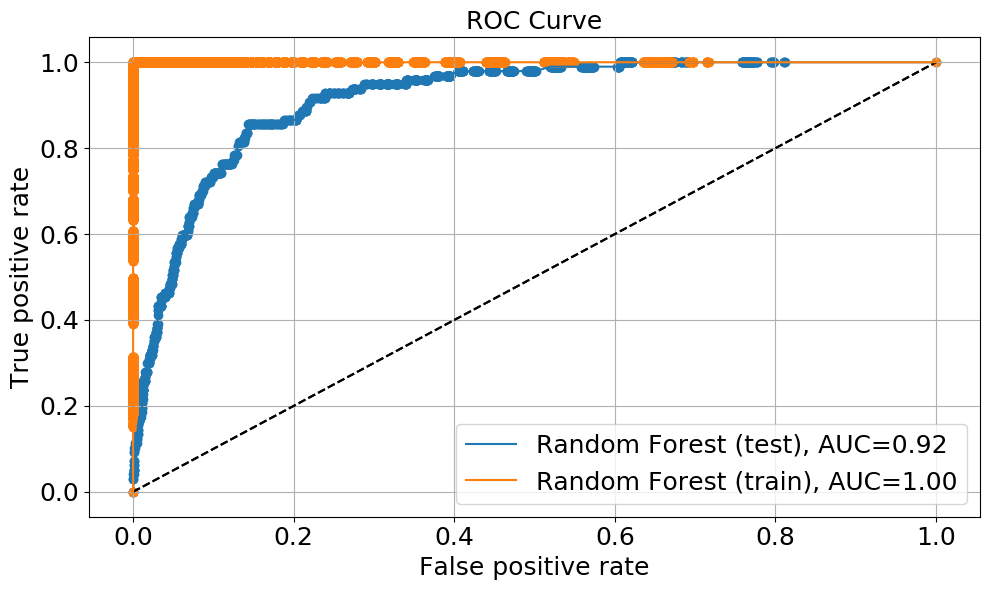

In [49]:
# draw out a ROC curve on the retrained model by comparing predictions with y_test
plt.style.use('default');
figure = plt.figure(figsize=(10, 6));   
ax = plt.subplot(1, 1, 1);
plot_roc(rfc, df_X_test, y_test, "Random Forest (test)", ax)
plot_roc(rfc, df_X_train, y_train, "Random Forest (train)", ax)
plt.legend(loc='lower right', fontsize=18);
plt.tight_layout();

In [66]:
# retrieve and store final scores into a dataframe
from sklearn.metrics import accuracy_score, roc_auc_score

tn, fp, fn, tp = confusion_matrix(y_test, rfc.predict(df_X_test)).ravel()
type1_per = (1. - tp/(tp+fn))*100
type2_per = (1. - tn/(fp+tn))*100
auc = roc_auc_score(y_test, rfc.predict_proba(df_X_test)[:,1]) * 100
accuracy = accuracy_score(y_test, rfc.predict(df_X_test)) * 100

df_result = pd.DataFrame(columns=['model','TP','TN','FP','FN','Type I Error (%)', 'Type II Error (%)','AUC (%)','ACC (%)'])
df_result.loc[0] = ['Random forest',tp,tn,fp,fn,type1_per,type2_per,auc,accuracy]

df_result

model  TP     TN   FP  FN  Type I Error (%)  Type II Error (%)  \
0  Random forest  41  15655  485  56         57.731959           3.004957   

     AUC (%)    ACC (%)  
0  91.833218  96.668104

In [63]:
# try different thresholds on the training set
proba = rfc.predict_proba(df_X_train)[:, 1]

df_thes_result = pd.DataFrame(columns=['threshold','TP','TN','FP','FN','Type I Error (%)', 'Type II Error (%)','ACC (%)'])
for thes in [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]:
    thes_scores = proba.copy()
    thes_scores[thes_scores > thes] = 1
    thes_scores[thes_scores <= thes] = 0
    thes_scores.astype('int')
    tn, fp, fn, tp = confusion_matrix(y_train, thes_scores).ravel()
    type1_per = (1. - tp/(tp+fn))*100
    type2_per = (1. - tn/(fp+tn))*100
    accuracy = accuracy_score(y_train, thes_scores) * 100
    df_thes_result.loc[int(thes*10) - 1] = [thes,tp,tn,fp,fn,type1_per,type2_per,accuracy]

df_thes_result

threshold       TP       TN      FP      FN  Type I Error (%)  \
0        0.1  76341.0  71553.0  4594.0     0.0          0.000000   
1        0.2  76341.0  74615.0  1532.0     0.0          0.000000   
2        0.3  76341.0  75771.0   376.0     0.0          0.000000   
3        0.4  76341.0  76146.0     1.0     0.0          0.000000   
4        0.5  76341.0  76147.0     0.0     0.0          0.000000   
5        0.6  76341.0  76147.0     0.0     0.0          0.000000   
6        0.7  76324.0  76147.0     0.0    17.0          0.022269   
7        0.8  76145.0  76147.0     0.0   196.0          0.256743   
8        0.9  75029.0  76147.0     0.0  1312.0          1.718605   

   Type II Error (%)     ACC (%)  
0           6.033068   96.987304  
1           2.011898   98.995331  
2           0.493782   99.753423  
3           0.001313   99.999344  
4           0.000000  100.000000  
5           0.000000  100.000000  
6           0.000000   99.988852  
7           0.000000   99.871465  
8           0.000000   99.139604

In [65]:
# try different thresholds on the testing set
proba = rfc.predict_proba(df_X_test)[:, 1]

df_thes_result = pd.DataFrame(columns=['threshold','TP','TN','FP','FN','Type I Error (%)', 'Type II Error (%)','ACC (%)'])
for thes in [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]:
    thes_scores = proba.copy()
    thes_scores[thes_scores > thes] = 1
    thes_scores[thes_scores <= thes] = 0
    thes_scores.astype('int')
    tn, fp, fn, tp = confusion_matrix(y_test, thes_scores).ravel()
    type1_per = (1. - tp/(tp+fn))*100
    type2_per = (1. - tn/(fp+tn))*100
    accuracy = accuracy_score(y_test, thes_scores) * 100
    df_thes_result.loc[int(thes*10) - 1] = [thes,tp,tn,fp,fn,type1_per,type2_per,accuracy]

df_thes_result

threshold    TP       TN      FP    FN  Type I Error (%)  \
0        0.1  81.0  13535.0  2605.0  16.0         16.494845   
1        0.2  70.0  14626.0  1514.0  27.0         27.835052   
2        0.3  58.0  15146.0   994.0  39.0         40.206186   
3        0.4  46.0  15462.0   678.0  51.0         52.577320   
4        0.5  41.0  15655.0   485.0  56.0         57.731959   
5        0.6  28.0  15826.0   314.0  69.0         71.134021   
6        0.7  19.0  15945.0   195.0  78.0         80.412371   
7        0.8  14.0  16038.0   102.0  83.0         85.567010   
8        0.9  10.0  16095.0    45.0  87.0         89.690722   

   Type II Error (%)    ACC (%)  
0          16.140025  83.857856  
1           9.380421  90.509331  
2           6.158612  93.637987  
3           4.200743  95.510254  
4           3.004957  96.668104  
5           1.945477  97.641190  
6           1.208178  98.318655  
7           0.631970  98.860627  
8           0.278810  99.187042

# Logistic Regression

In [67]:
# figure out important features using Logistic Regression
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(random_state=random,n_jobs=-1)
%time lr.fit(X_train, y_train)

# rank the most important features
important_features = pd.DataFrame(data={'name':list(df_403features),"logistic regression importance":np.abs(lr.coef_)[0]}).sort_values(by='logistic regression importance',ascending=False)
important_features.head()

Wall time: 2min 7s


name  logistic regression importance
172      Operational_Margin / Tobin's_Q                       21.496880
130        Assets_Growth * Productivity                        8.016783
141  Leverage_Ratio * Market_Book_Ratio                        7.531192
116                  EPS * Productivity                        5.617883
103       Asset_Turnover * Sales_Growth                        5.319109

In [68]:
# pick the top 20 most important features
num_features = 20

df_X_train = pd.DataFrame(data=X_train,columns=list(df_rem_features_non_null))
df_X_train = df_X_train[list(important_features.head(num_features).name)]
df_X_test = pd.DataFrame(data=X_test,columns=list(df_rem_features_non_null))
df_X_test = df_X_test[list(important_features.head(num_features).name)]

# store important feature names
lr_feature_names = list(important_features.head(num_features).name)
lr_feature_names

["Operational_Margin / Tobin's_Q",
 'Assets_Growth * Productivity',
 'Leverage_Ratio * Market_Book_Ratio',
 'EPS * Productivity',
 'Asset_Turnover * Sales_Growth',
 'Asset_Turnover * Assets_Growth',
 "EPS * Tobin's_Q",
 'Employee_Growth * Operational_Margin',
 'Operational_Margin / Assets_Growth',
 'Productivity * Return_on_Equity',
 "EPS / Tobin's_Q",
 'Liquidity * Operational_Margin',
 'Liquidity * Market_Book_Ratio',
 'Asset_Turnover / Assets_Growth',
 'EPS * Return_on_Equity',
 'Assets_Growth * Sales_Growth',
 'Assets_Growth * Liquidity',
 'Employee_Growth * Liquidity',
 'Profitability / Assets_Growth',
 "Profitability * Tobin's_Q"]

In [31]:
# import model and fine tune parameters with cross validation to get the best parameters

hyperparams = {'penalty': ['l1', 'l2', 'elasticnet', 'none'],
              'solver':['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
              'random_state':[random],
              'C':[1.0,0.5,0.7,1.3,1.5],
               'max_iter':[50,100,500,1000],
               'warm_start':[True,False],
               'tol':[1e-4,1e-5,1e-3]
              }

lr = LogisticRegression()

gridsearch = RandomizedSearchCV(lr,hyperparams,cv=10,scoring='roc_auc',return_train_score=True,error_score=0.0,n_jobs=-1,n_iter=30, random_state=random)
%time gridsearch.fit(df_X_train, y_train)

print(gridsearch.best_score_)
print(gridsearch.best_params_)
print(gridsearch.best_estimator_)

Wall time: 5h 12min 4s
0.7912645098441797
{'warm_start': False, 'tol': 0.001, 'solver': 'lbfgs', 'random_state': 42, 'penalty': 'none', 'max_iter': 500, 'C': 0.7}
LogisticRegression(C=0.7, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=500,
                   multi_class='auto', n_jobs=None, penalty='none',
                   random_state=42, solver='lbfgs', tol=0.001, verbose=0,
                   warm_start=False)


In [32]:
# re-train model with the best parameter found above and print out its important features found by the model
lr = gridsearch.best_estimator_
lr.fit(df_X_train, y_train)
lr.coef_

array([[ 2.09467120e+01, -8.86522503e+01,  4.66350374e+00,
        -2.56965665e+01, -3.39964380e+01,  2.21281237e+00,
        -2.43995334e+02,  6.35606184e+01,  2.94402969e-02,
        -1.12211588e+02,  1.13032004e+02, -3.10307539e+01,
         5.11144195e+00, -3.64130641e+01, -4.47904088e+02,
        -9.25481337e+01,  1.95434947e+02,  5.31226136e+01,
         2.72449256e+01,  1.10715438e+00]])

In [54]:
# store all randomsearch history data
lr_randomsearch_history = pd.DataFrame(data=gridsearch.cv_results_)
lr_randomsearch_history.head(30)

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0        4.198071      0.031007         0.006982        0.001784   
1        4.194680      0.033746         0.006783        0.000747   
2     4178.977852   4890.219154         0.008281        0.000891   
3        6.989204      1.009692         0.008777        0.000399   
4        1.874184      0.099303         0.009674        0.001002   
5     1031.656651    514.437251         0.008877        0.001041   
6      144.629049      6.428368         0.008677        0.000639   
7        5.812251      0.676316         0.008478        0.000499   
8        0.053256      0.006436         0.000000        0.000000   
9        6.816963      0.052994         0.008479        0.000805   
10      67.533960      8.467664         0.007681        0.000779   
11       5.330939      0.048732         0.007482        0.000670   
12      10.922882      0.083370         0.007382        0.000488   
13       0.042685      0.000870         0.000000        0.000000   
14       0.041787      0.003525         0.000000        0.000000   
15      52.087178      0.234162         0.007382        0.000489   
16      10.898648      0.068174         0.007282        0.000780   
17     121.744859      1.146585         0.007482        0.000669   
18       0.041089      0.000599         0.000000        0.000000   
19       0.044081      0.006492         0.000000        0.000000   
20       5.233799      0.027276         0.007581        0.000489   
21      10.815671      0.070740         0.007581        0.000661   
22       0.042285      0.002609         0.000000        0.000000   
23      10.636947      0.418993         0.007382        0.000661   
24       5.930336      0.831917         0.008578        0.001277   
25       5.186127      0.377649         0.007880        0.000828   
26      54.119442      0.228348         0.007481        0.000670   
27      55.413381      2.781690         0.007879        0.000941   
28      16.002496      1.946616         0.008079        0.000941   
29     837.422384    515.143389         0.008977        0.001093   

   param_warm_start param_tol param_solver param_random_state param_penalty  \
0             False     1e-05         saga                 42          none   
1              True     0.001         saga                 42            l2   
2             False     1e-05    liblinear                 42            l1   
3             False     1e-05        lbfgs                 42            l2   
4             False     1e-05        lbfgs                 42          none   
5              True     1e-05    liblinear                 42            l1   
6             False    0.0001         saga                 42            l2   
7             False    0.0001    newton-cg                 42            l2   
8             False     0.001         saga                 42    elasticnet   
9              True    0.0001          sag                 42          none   
10            False     0.001         saga                 42            l1   
11            False     1e-05          sag                 42          none   
12             True     0.001         saga                 42          none   
13             True     0.001        lbfgs                 42    elasticnet   
14            False     0.001    liblinear                 42          none   
15            False    0.0001          sag                 42          none   
16            False     0.001         saga                 42            l2   
17            False    0.0001         saga                 42            l1   
18            False     1e-05          sag                 42    elasticnet   
19            False     0.001    newton-cg                 42            l1   
20             True     1e-05          sag                 42            l2   
21             True     0.001         saga                 42          none   
22            False     0.001    newton-cg                 42    elasticnet   

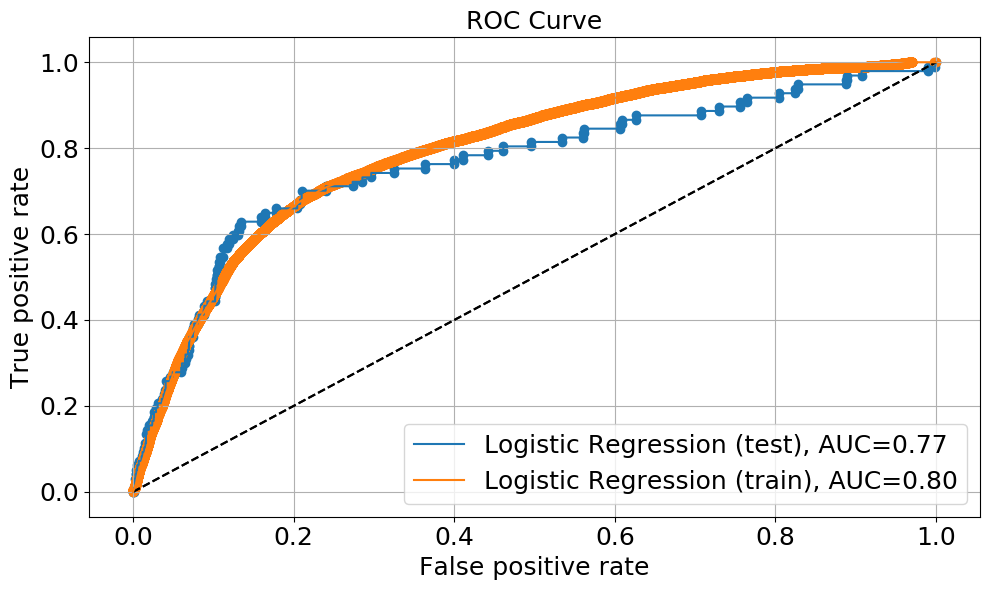

In [39]:
# draw out a ROC curve on the retrained model by comparing predictions with y_test
plt.style.use('default');
figure = plt.figure(figsize=(10, 6));   
ax = plt.subplot(1, 1, 1);
plot_roc(lr, df_X_test, y_test, "Logistic Regression (test)", ax)
plot_roc(lr, df_X_train, y_train, "Logistic Regression (train)", ax)
plt.legend(loc='lower right', fontsize=18);
plt.tight_layout();

In [71]:
# retrieve and store final scores into a dataframe
tn, fp, fn, tp = confusion_matrix(y_test, lr.predict(df_X_test)).ravel()
type1_per = (1. - tp/(tp+fn))*100
type2_per = (1. - tn/(fp+tn))*100
auc = roc_auc_score(y_test, lr.predict_proba(df_X_test)[:,1]) * 100
accuracy = accuracy_score(y_test, lr.predict(df_X_test)) * 100

df_result.loc[1] = ['Logistic regression',tp,tn,fp,fn,type1_per,type2_per,auc,accuracy]

df_result

model  TP     TN    FP  FN  Type I Error (%)  \
0        Random forest  41  15655   485  56         57.731959   
1  Logistic regression  75  10460  5680  22         22.680412   

   Type II Error (%)    AUC (%)    ACC (%)  
0           3.004957  91.833218  96.668104  
1          35.192069  77.827163  64.882675

In [72]:
# try different thresholds on the training set
proba = lr.predict_proba(df_X_train)[:, 1]

df_thes_result = pd.DataFrame(columns=['threshold','TP','TN','FP','FN','Type I Error (%)', 'Type II Error (%)','ACC (%)'])
for thes in [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]:
    thes_scores = proba.copy()
    thes_scores[thes_scores > thes] = 1
    thes_scores[thes_scores <= thes] = 0
    thes_scores.astype('int')
    tn, fp, fn, tp = confusion_matrix(y_train, thes_scores).ravel()
    type1_per = (1. - tp/(tp+fn))*100
    type2_per = (1. - tn/(fp+tn))*100
    accuracy = accuracy_score(y_train, thes_scores) * 100
    df_thes_result.loc[int(thes*10) - 1] = [thes,tp,tn,fp,fn,type1_per,type2_per,accuracy]

df_thes_result

threshold       TP       TN       FP       FN  Type I Error (%)  \
0        0.1  75726.0   5362.0  70785.0    615.0          0.805596   
1        0.2  75488.0   7395.0  68752.0    853.0          1.117355   
2        0.3  75288.0  11132.0  65015.0   1053.0          1.379337   
3        0.4  73857.0  20772.0  55375.0   2484.0          3.253822   
4        0.5  60760.0  50060.0  26087.0  15581.0         20.409741   
5        0.6  20774.0  72072.0   4075.0  55567.0         72.787886   
6        0.7   9015.0  74537.0   1610.0  67326.0         88.191142   
7        0.8   4982.0  75308.0    839.0  71359.0         93.474018   
8        0.9   2610.0  75689.0    458.0  73731.0         96.581129   

   Type II Error (%)    ACC (%)  
0          92.958357  53.176643  
1          90.288521  54.353785  
2          85.380908  56.673312  
3          72.721184  62.056686  
4          34.258736  72.674571  
5           5.351491  60.887414  
6           2.114331  54.792508  
7           1.101816  52.653324  
8           0.601468  51.347647

In [74]:
# try different thresholds on the testing set
proba = lr.predict_proba(df_X_test)[:, 1]

df_thes_result = pd.DataFrame(columns=['threshold','TP','TN','FP','FN','Type I Error (%)', 'Type II Error (%)','ACC (%)'])
for thes in [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]:
    thes_scores = proba.copy()
    thes_scores[thes_scores > thes] = 1
    thes_scores[thes_scores <= thes] = 0
    thes_scores.astype('int')
    tn, fp, fn, tp = confusion_matrix(y_test, thes_scores).ravel()
    type1_per = (1. - tp/(tp+fn))*100
    type2_per = (1. - tn/(fp+tn))*100
    accuracy = accuracy_score(y_test, thes_scores) * 100
    df_thes_result.loc[int(thes*10) - 1] = [thes,tp,tn,fp,fn,type1_per,type2_per,accuracy]

df_thes_result

threshold    TP       TN       FP    FN  Type I Error (%)  \
0        0.1  95.0    505.0  15635.0   2.0          2.061856   
1        0.2  95.0    862.0  15278.0   2.0          2.061856   
2        0.3  94.0   1651.0  14489.0   3.0          3.092784   
3        0.4  90.0   3772.0  12368.0   7.0          7.216495   
4        0.5  75.0  10460.0   5680.0  22.0         22.680412   
5        0.6  26.0  15354.0    786.0  71.0         73.195876   
6        0.7  11.0  15836.0    304.0  86.0         88.659794   
7        0.8   7.0  15984.0    156.0  90.0         92.783505   
8        0.9   2.0  16069.0     71.0  95.0         97.938144   

   Type II Error (%)    ACC (%)  
0          96.871128   3.695264  
1          94.659232   5.893946  
2          89.770756  10.747059  
3          76.629492  23.785182  
4          35.192069  64.882675  
5           4.869888  94.721931  
6           1.883519  97.598078  
7           0.966543  98.484942  
8           0.439901  98.977644